In [4]:
def load_patient_data(clinical_datapath):
    patientdata = pd.read_excel(clinical_datapath).drop([0,1])
    patientdata["Pat_no"] = patientdata["Pat_no"].astype(int)
    patientdata = patientdata.set_index("Pat_no")
    return patientdata

clinical_data = load_patient_data(cfg.CLINICAL_DATA_XL)

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import config as cfg
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [6]:
clinical_data

,ICD_incl,consent,BSA,Gender,age_inclusion,Weight,Height,BMI,syst_BP,diast_BP,...,Amiodarone,Verapamil,Aborted_cardiac_arrest.1,Ventricular_tachycardia.1,nsVT.1,nsVT_study_start.1,Holter_nsVT.1,S_EKG_nsVT.1,NSVT_Holter_stress,Unnamed: 457
Pat_no,,,,,,,,,,,,,,,,,,,,,
3,0.0,1.0,1.59,1.0,66.000000,54.0,1.65,19.8,147.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,0.0,NaN,1.97,0.0,45.000000,75.0,1.83,22.4,129.0,72.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
15,0.0,1.0,2.06,0.0,60.000000,90.0,1.80,27.8,134.0,80.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
17,0.0,1.0,1.52,1.0,66.000000,49.0,1.64,18.2,152.0,82.0,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
19,0.0,1.0,1.76,1.0,76.000000,70.0,1.63,26.3,139.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,NaN,NaN,NaN,1.0,52.716667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,NaN,NaN,NaN,1.0,25.019444,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,1.0,25.002778,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


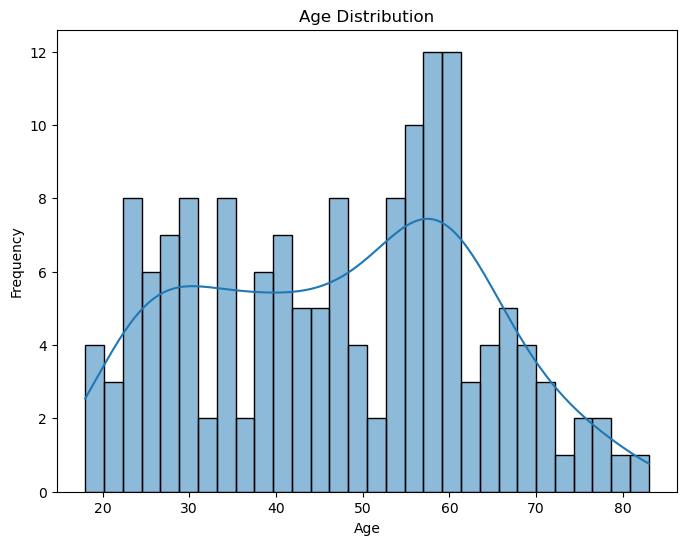

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(8, 6))
sns.histplot(clinical_data['age_inclusion'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
feature_lv = ["CMR_LV_mass","CMR_LV_EDV", "CMR_LV_ESV", "CMR_EF",
"CMR_max_ED_thickness_ineferolat_wall","CMR_max_ES_thickness_ineferolat_wall","LA_Volume",
"LVEDD","LVESD","LVPWd","IVSs"]
feature_mad = ["Aborted_cardiac_arrest","Ventricular_tachycardia","nsVT","MVP_new", "CMR_Largest_MAD","CMR_Degree_largest_MAD","CMR_MA_diam_sys","CMR_MA_diam_dia","CMR_LGE_POST_Pap_muscle","CMR_max_ED_thickness_ineferolat_wall"]
# feature = ["Aborted_cardiac_arrest","Ventricular_tachycardia","nsVT","MVP_new", "CMR_Largest_MAD","CMR_Degree_largest_MAD","CMR_MA_diam_sys","CMR_MA_diam_dia","TAD_presence",
# "CMR_LV_mass","CMR_LV_EDV", "CMR_LV_ESV", "CMR_EF","CMR_LGE_Myocardium_percent","CMR_LGE_ANT_Pap_muscle",
# "CMR_LGE_POST_Pap_muscle","CMR_max_ED_thickness_ineferolat_wall","CMR_max_ES_thickness_ineferolat_wall","T_inv_inf_wall","Leaflet_thickness","LA_Volume","Mitral_regurg"
# ,"Mitral_stenosis","LVEDD","LVESD","LVPWd","IVSs","Prolapse_ESC_Y_N","Flail","Mitral_Annulus_systole","Mitral_Annulus_diastole","MAPSE_lat","GLS_LV","CMR_Degree_largest_MAD"]
feature = feature_lv
features = clinical_data[feature].fillna(0).to_numpy()
print(features.shape)


(155, 11)


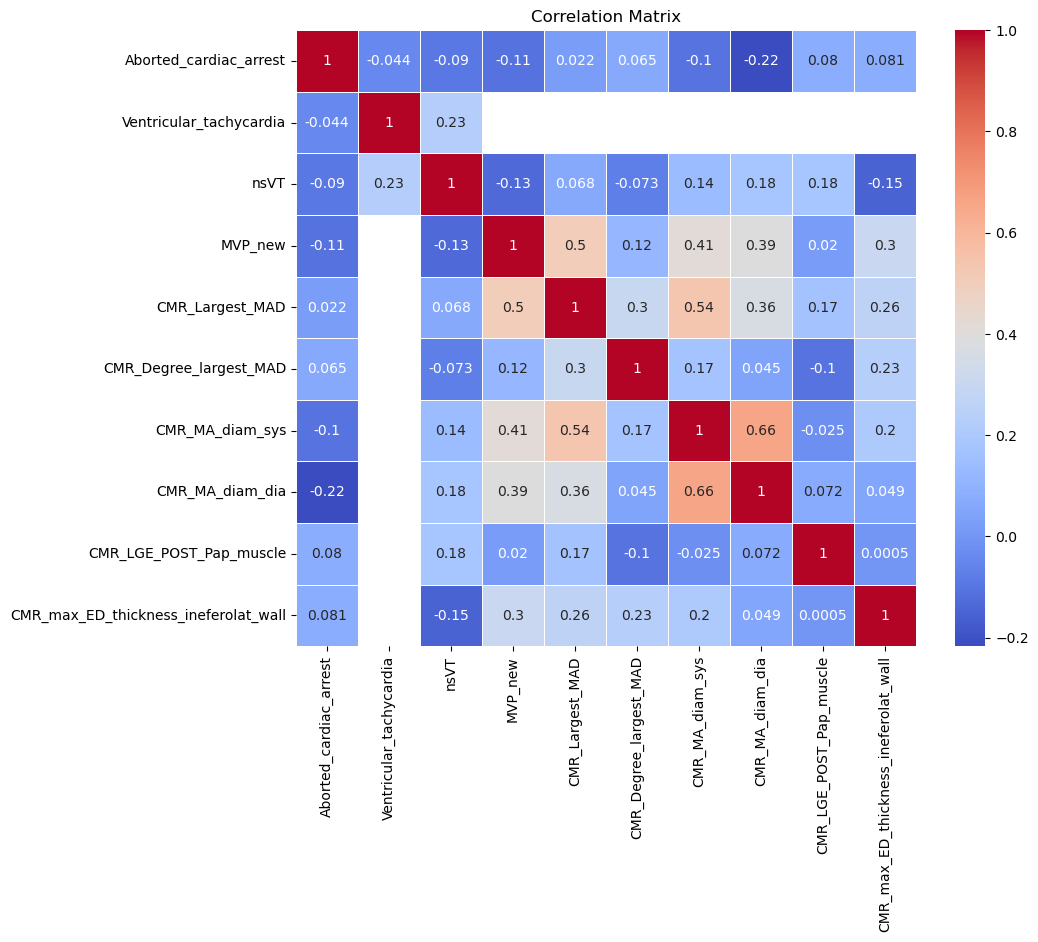

In [15]:
plt.figure(figsize=(10, 8))
corr_matrix = clinical_data[feature_mad].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()